<h1><center>PHYS-F-303: Partie Numérique</center></h1>
<h1><center>Calcul détaillé des propriétés physiques pour le modèle d'Ising</center></h1>
<h2><center>Cédric SCHOONEN, Maxime JAMOTTE</center></h2>

Vérifions dans ce notebook qu'un autre choix de condition initiale n'influence pas le calcul prenant compte de la corrélation des spins dans la condition initiale originale.

In [1]:
import time,pandas
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

### Calcul des paramètres (Magnétisation, Energie, Capacité calorifique) pour différents couplages

In [2]:
import Ising_capacalo_jit as Ising

In [3]:
NMC = 100+7000 # M et E calculées sur NMC-NMC_eq itérations
NMC_eq = 100
nx = 20
ny = 20
alphas = np.concatenate((np.arange(0,0.34,0.02) , np.arange(0.34,0.41,0.005), np.arange(0.41,0.425,0.001) , \
                         np.arange(0.425,0.445,0.0003), np.arange(0.435,0.45,0.001), np.arange(0.45,0.56,0.005), \
                         np.arange(0.56,1,0.02)))

alphasAbove043 = alphas[np.where(alphas>=0.43)]
resolution = 1/(alphasAbove043[1]-alphasAbove043[0])

np.random.shuffle(alphas) # pour avoir des données utilisables en cours de simulation
a = len(alphas)

sps = np.empty([a,nx,ny])
for i in range(a):
    sps[i] = Ising.initial_state_random(nx,ny)
    
# Affichage des paramètres choisis
print("Number of alphas: {:d}".format(a))
print("NMC per alpha: {:d}".format(NMC-NMC_eq))
print("Resolution close to the transition: 1/{:.3f}".format(resolution))
    
# Estimation du temps de calcul. Estimation propre à une machine particuliere. Pour estimer le temps de calcul sur 
# votre machine, lancer le calcul de la cellule suivante pour un petit nombre d'itération et modifier ce qui suit.
print("Estimated computation time per grid: {:.2f} hours".format(NMC/20000*a/92*1.00))

Number of alphas: 175
NMC per alpha: 7000
Resolution close to the transition: 1/3333.333
Estimated computation time per grid: 0.68 hours


Décommenter et exécuter la cellule suivante lance le calcul complet:

In [4]:
for i in range(1):
    
    print("run number {:d}".format(i))
    start = time.time()
    #[Ms,Es,VarEs] = Ising.M_equilibrium_for_alphas(
    #    sps,nx,ny,NMC,1,alphas,NMC_eq,"dataIsing/new-dataIsing-random-Res=3333-NMC=7000-Run={:d}.csv".format(i))
    stop = time.time()
    print(stop-start)

run number 0
7.152557373046875e-07


L'affichage d'une des courbes obtenues se fait ici:

In [5]:
dataIsing = pandas.read_csv('dataIsing/dataIsing-random-Res=3333-NMC=7000-Run=0.csv')
[alphas, Ms, Es, VarEs] = np.transpose(dataIsing.as_matrix(['Couplage', '<Magnetisation>', \
                                                            '<Energie>', 'Var(Energie)']))

indices = np.argsort(alphas)
alphas = alphas[indices]
Ms = Ms[indices]
Es = Es[indices]/2 # /2 car nous avions surestimé l'énergie d'un facteur 2 
VarEs = VarEs[indices]/4
Cvs = VarEs # énergie exprimées en kT

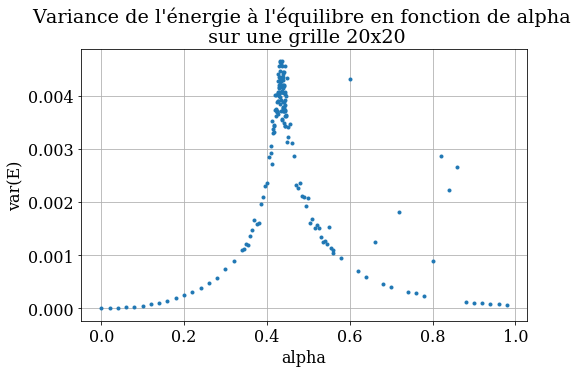

In [6]:
plt.figure(figsize=(8,5));
plt.plot(alphas,Cvs, '.');
plt.title("Variance de l'énergie à l'équilibre en fonction de alpha \n sur une grille {:d}x{:d}".format(nx,ny));
plt.xlabel('alpha');
plt.ylabel('var(E)');
#plt.xlim([0.41,0.46]);
plt.grid();
plt.show()

### Fit des données et recherche du maximum

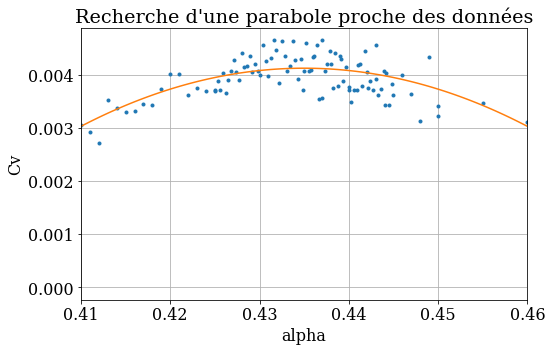

-1.75 0.435 0.004125


In [7]:
A = -7/4
X0 = 0.435
C = 0.0165/4

x = np.linspace(0.41,0.46,100)
y = A*(x-X0)**2+C

plt.figure(figsize=(8,5));
plt.plot(alphas,Cvs, '.');
plt.plot(x,y, '-');
plt.title("Recherche d'une parabole proche des données".format(nx,ny));
plt.xlabel('alpha');
plt.ylabel('Cv');
plt.xlim([0.41,0.46]);
plt.grid();
plt.show()

print(A,X0,C)

In [8]:
import Least_Squares

In [9]:
nbfichiers = 1

alphas_max = np.empty(nbfichiers)
err_alphas_max = np.empty(nbfichiers)

A_test  = np.linspace(-15.0,-5.0,11)/4
X0_test = np.linspace(0.430,0.440,201) # paramètre le plus pertinent -> plus de points
C_test  = np.linspace(0.0160,0.0170,11)/4

for i in range(nbfichiers):
    
    print("Run {:d}".format(i))
    [alphas_max[i], err_alphas_max[i]] = \
        Least_Squares.moindres_carres_avec_erreur("dataIsing/dataIsing-random-Res=3333-NMC=7000-Run={:d}.csv"\
            .format(i),A_test,X0_test,C_test)


Run 0
Best fitting parameters: -2.5000 0.4334 0.0042
Le maximum de la parabole de fit se trouve en alpha = 0.43335 +- 0.00013
Erreur numérique: 0.00005 - Erreur Statistique: 0.00012
--------------------------------------------------------------------


Rappellons que nous avions trouvé un alpha critique de $0.4336(10)$ pour $N=20$. Nous vérifions donc que ce résultat tombe dans la marge d'erreur prévue. La vérification n'a été faite que pour un résultat, mais le test étant plutôt qualitatif nous nous contenterons de ce résultat.